## curve fitting

In [18]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [19]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

In [20]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

In [21]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

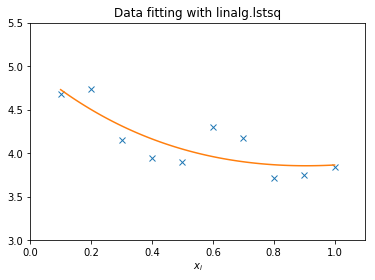

In [22]:
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

# A linear transformation of the plane $R^2$ is a geometric transformation of the form

$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
a  &b\\
c & d
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 


In [26]:
A.dot(b)

array([ 50, 110])

## A more visual example. Matrix transformation

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Some visual settings: 

In [43]:
mpl.rcParams.update({'image.cmap': 'Accent',
                     'image.interpolation': 'none',
                     'xtick.major.width': 0,
                     'xtick.labelsize': 0,
                     'ytick.major.width': 0,
                     'ytick.labelsize': 0,
                     'axes.linewidth': 0})

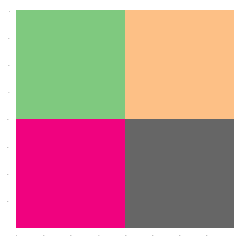

In [44]:
aux = np.ones((100, 100), dtype=int)
src = np.vstack([np.c_[aux, 2*aux], np.c_[3*aux, 4*aux]])
plt.imshow(src)
plt.show()

In [45]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

Scaling the plane in the x-axis by a factor of 1.5:

$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
1.5  &0\\
0 & 0
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

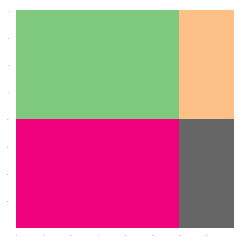

In [46]:
a = np.array([[1.5, 0],
              [0, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

Dilating the plane by a factor of 1.8:

$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
1.8  &0\\
0 & 1.8
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

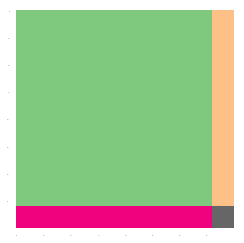

In [47]:
a = 1.8*np.eye(2)
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

## Q1. Dilating the plane by a factor of 0.5:

$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
0.5  &0\\
0 & 0.5
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

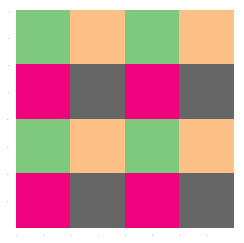

In [48]:
a = .5*np.eye(2)
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

## Q2. Scaling the plane in the y-axis by a factor of 0.5:

$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
?  &?\\
? & ?
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

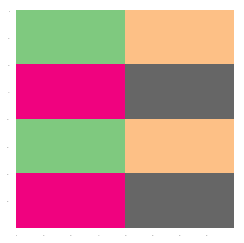

In [49]:
a = np.array([[1, 0],
              [0, .5]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

Shearing about the y-axis with a vertical displacement of +x/2:
  
$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
1  &0\\
1/2 & 0
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

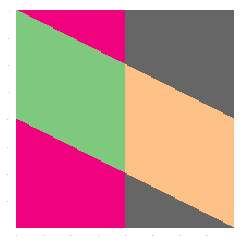

In [50]:
a = np.array([[1, 0],
              [.5, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

Rotation through $45^∘$ about the origin:
  
$f \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
cos(pi/2)  &sin (pi/2)\\
sin (pi/2) & -cos(pi/2)
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}$ 

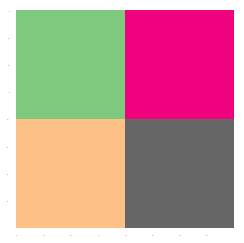

In [51]:
alpha = np.pi/4
a = np.array([[np.cos(2*alpha), np.sin(2*alpha)],
              [np.sin(2*alpha), -np.cos(2*alpha)]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()